<a href="https://colab.research.google.com/github/nagilla-venkatesh/GenerativeAI/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datagy/data/main/insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [11]:
# Exploring the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [12]:
df = df.select_dtypes(include=['number'])

In [13]:
print(df.corr())

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


# **Plotting a Pairwise Plot of the Data**

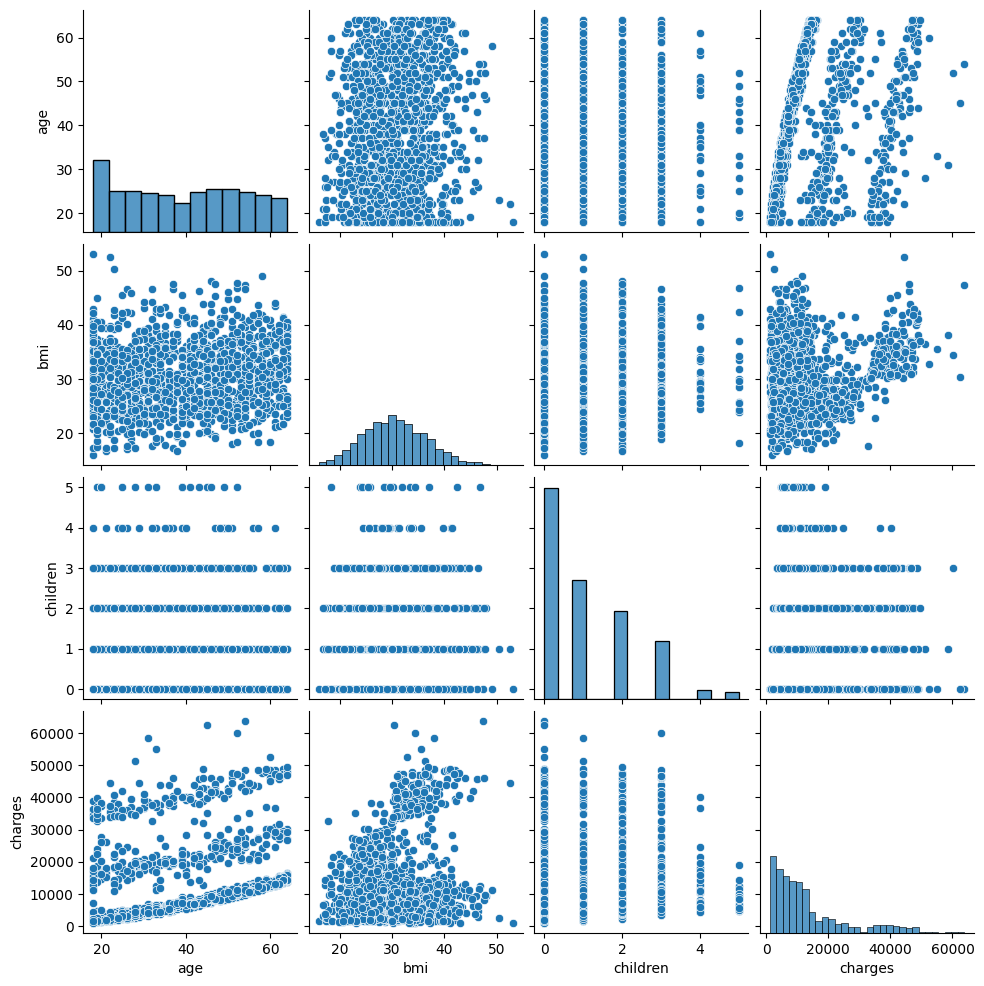

In [14]:
# Creating a pairwise plot in Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

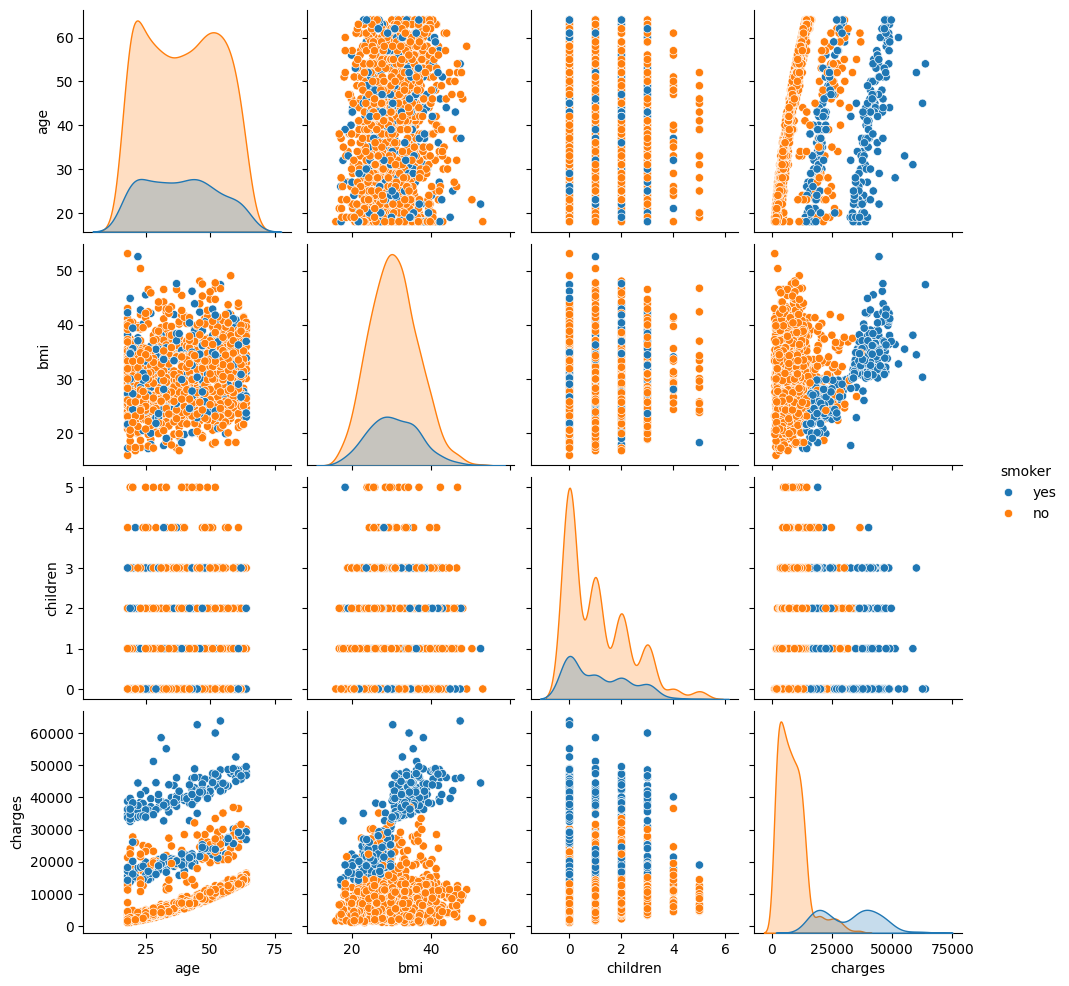

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/datagy/data/main/insurance.csv')
# Plotting a pairplot of your DataFrame
sns.pairplot(df, hue='smoker')
plt.show()

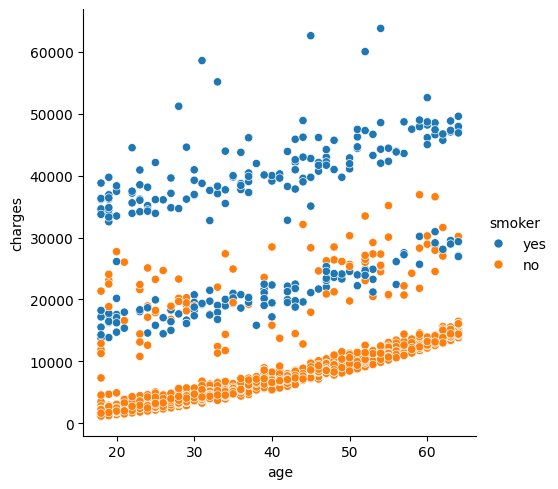

In [20]:
# Plotting a scatterplot of the relationship of age and charges
sns.relplot(data=df, x='age', y='charges', hue='smoker')
plt.show()

In [24]:
non_smokers = df[df['smoker'] == 'no']

In [29]:
# Select only numerical columns before calculating correlation
numerical_non_smokers = non_smokers.select_dtypes(include=['number'])

# Calculate the correlation matrix
numerical_non_smokers.corr()

,age,bmi,children,charges
age,1.000000,0.122638,0.033395,0.627947
bmi,0.122638,1.000000,0.019208,0.084037
children,0.033395,0.019208,1.000000,0.138929
charges,0.627947,0.084037,0.138929,1.000000


# **Building a Linear Regression Model Using Scikit-Learn**

In [30]:
# Instantiating a LinearRegression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [31]:
X = non_smokers[['age']]
y = non_smokers['charges']

In [32]:
# Checking the type of our arrays
print('The type of X is ', type(X))
print('The type of y is ', type(y))

The type of X is  <class 'pandas.core.frame.DataFrame'>
The type of y is  <class 'pandas.core.series.Series'>


In [33]:
# Splitting the datasets into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

In [34]:
# Fitting our model
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Running Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.4085206085167331
The rmse is:  4737.607245507907


# **Multivariate Linear Regression in Scikit-Learn**

In [36]:
# Creating new variables
X = non_smokers[['age', 'bmi']]
y = non_smokers['charges']

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

# Creating a new model and fitting it
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Prediction new values
predictions = multi_model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.392115716738932
The rmse is:  4656.833836762395


In [37]:
# Creating new variables
df['smoker_int'] = df['smoker'].map({'yes':1, 'no':0})
X = df[['age', 'bmi', 'smoker_int']]
y = df['charges']

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

# Creating a new model and fitting it
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Prediction new values
predictions = multi_model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.7159812234116081
The rmse is:  38986477.81529049


In [38]:
# Printing coefficients and intercept
print(multi_model.coef_)
print(multi_model.intercept_)

[  239.27544615   389.79973685 24976.755291  ]
-13214.69426109155


In [40]:
#Writing a function to predict charges
coefficients = multi_model.coef_
intercept = multi_model.intercept_
def calculate_charges(age, bmi, smoker):
  return (age * coefficients[0]) + (bmi * coefficients[1]) + (smoker * coefficients[2]) + intercept

In [43]:
# Predicting charges
print(calculate_charges(33, 22, 0))

3256.989672409054
